In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

In [2]:
data=pd.read_csv('training_data_2.csv')

In [3]:
data=data.drop('Unnamed: 0', axis=1)

In [4]:
from sklearn.preprocessing import LabelEncoder
data=data.apply(LabelEncoder().fit_transform)

In [5]:
X=data.drop('status_group',axis=1)
y=data['status_group']

In [6]:
## Converting the Training dataframe into a matrix and predictor as y 
data_X = X.as_matrix()
data_y = y.tolist()

In [7]:
correlated_features = set()
correlation_matrix = data.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [8]:
rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
   estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=101,
            verbose=0, warm_start=False),
   n_jobs=1, scoring='accuracy', step=1, verbose=0)

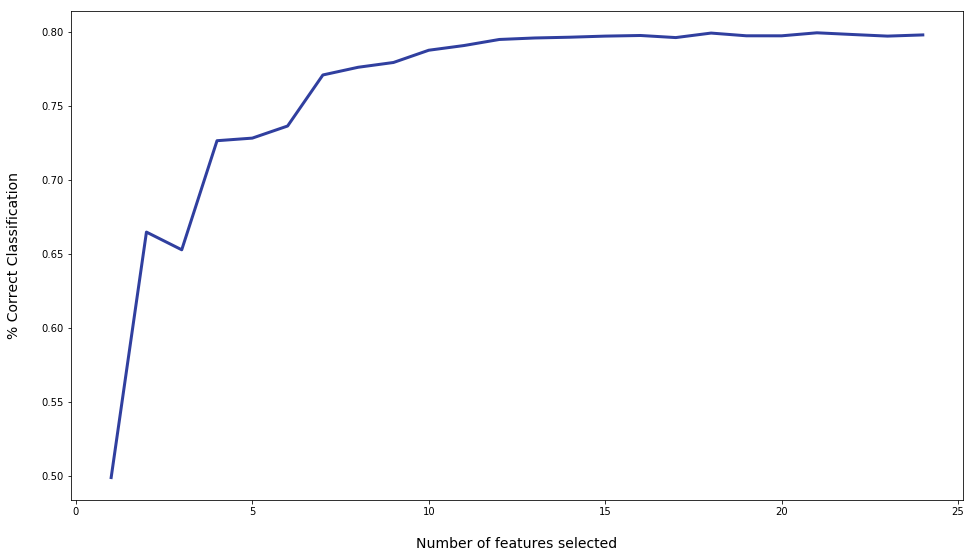

In [9]:
plt.figure(figsize=(16, 9))
#plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [10]:
print(np.where(rfecv.support_ == False)[0])

X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

[11 14 21]


In [11]:
dset = pd.DataFrame()
dset['attr'] = X.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)


dset

,attr,importance
17,quantity_group,0.122494
5,longitude,0.120975
6,latitude,0.118503
8,subvillage,0.077954
1,days_since_recorded,0.071123
3,gps_height,0.069584
10,population,0.047379
19,waterpoint_type,0.039611
20,waterpoint_type_group,0.039069
14,extraction_type,0.036666


In [12]:
plt.barh?